<a href="https://colab.research.google.com/github/Sghosh32/MNIST-Digit-Classifier/blob/main/MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [2]:
# Normalizing Tensors
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.137), (0.381))])

In [3]:
# Initializing Training and Test Sets
trainset = datasets.MNIST(root = 'data', train = True, transform = trans, download = True)
testset = datasets.MNIST(root = 'data', train = 'False', transform = trans, download =True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [17]:
# Hyperparamters
epochs = 10
classes = 10
batch_size = 64
lr = 0.001

In [6]:
# Loading Train and Test data
train_load = DataLoader(dataset = trainset, batch_size = batch_size, shuffle = True)
test_load = DataLoader(dataset = testset, batch_size = batch_size, shuffle = False)

In [35]:
# Applying Convolution and FC layers and forward propagation 
class CNN(nn.Module):
  def __init__(self):
      super(CNN, self).__init__()

      self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2)
      self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)

      self.fc1 = nn.Linear(in_features = 32 * 7 * 7, out_features = 512)
      self.fc2 = nn.Linear(in_features = 512, out_features = 128)
      self.fc3 = nn.Linear(in_features = 128, out_features = 16)
    
  def forward(self, x):
    x = self.conv1(x)
    x = nn.functional.relu(x)
    y = nn.MaxPool2d(kernel_size = 2, stride = 2)
    x = y(x)

    x = self.conv2(x)
    x = nn.functional.relu(x)
    y = nn.MaxPool2d(kernel_size = 2, stride = 2)
    x = y(x)

    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)

    return x

In [28]:
# Calculating loss
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [32]:
# Training the classifier and calculating its accuracy
total_step = len(train_load)
loss_list = []
accuracy = []

for epoch in range(epochs):
  for i,(images, labels) in enumerate(train_load):
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    accuracy.append(correct / total)

    if (i + 1) % 100 == 0:
      print("Epoch: ", epoch, "Loss: ", loss.item(), "Accuracy: ", (correct / total) * 100)

Epoch:  0 Loss:  0.07893721014261246 Accuracy:  98.4375
Epoch:  0 Loss:  0.2723965346813202 Accuracy:  92.1875
Epoch:  0 Loss:  0.19330278038978577 Accuracy:  96.875
Epoch:  0 Loss:  0.01979229412972927 Accuracy:  100.0
Epoch:  0 Loss:  0.0813293382525444 Accuracy:  98.4375
Epoch:  0 Loss:  0.00662889052182436 Accuracy:  100.0
Epoch:  0 Loss:  0.04302242398262024 Accuracy:  98.4375
Epoch:  0 Loss:  0.07253284752368927 Accuracy:  96.875
Epoch:  0 Loss:  0.03288549929857254 Accuracy:  98.4375
Epoch:  1 Loss:  0.03132444620132446 Accuracy:  98.4375
Epoch:  1 Loss:  0.07674480229616165 Accuracy:  95.3125
Epoch:  1 Loss:  0.024074086919426918 Accuracy:  100.0
Epoch:  1 Loss:  0.11133427172899246 Accuracy:  96.875
Epoch:  1 Loss:  0.014517047442495823 Accuracy:  98.4375
Epoch:  1 Loss:  0.05918952450156212 Accuracy:  98.4375
Epoch:  1 Loss:  0.033748723566532135 Accuracy:  98.4375
Epoch:  1 Loss:  0.15951691567897797 Accuracy:  93.75
Epoch:  1 Loss:  0.004599892534315586 Accuracy:  100.0
Epo

Prediction :  5
Test Accuracy :  99.32


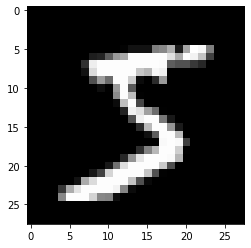

In [34]:
# Predicting a number and finding the model accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  count = 0
  for images, labels in test_load:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    while (count < 1):
      plt.imshow(images[count][0], cmap='gray', interpolation = 'none')
      print("Prediction : ", int(predicted[count]))
      count = count + 1
  print("Test Accuracy : ", (correct / total) * 100)